# 1.) Importing libraries

In [3]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r"C:\Users\andyc\Achievement 4 Project"

In [5]:
customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merge.pkl'))

In [5]:
#checking the columns for the customer dataframe
customer.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days', 'Slowest days',
       'Busiest_days', 'Slowest_days', 'busiest_period_of_day', 'Busy_days',
       'max_order', 'loyalty_flag', 'average_spending', 'spending_flag',
       'order_regularity', 'order_frequency_flag', 'merge_c'],
      dtype='object')

# 3.) Histogram

Text(0, 0.5, 'Orders')

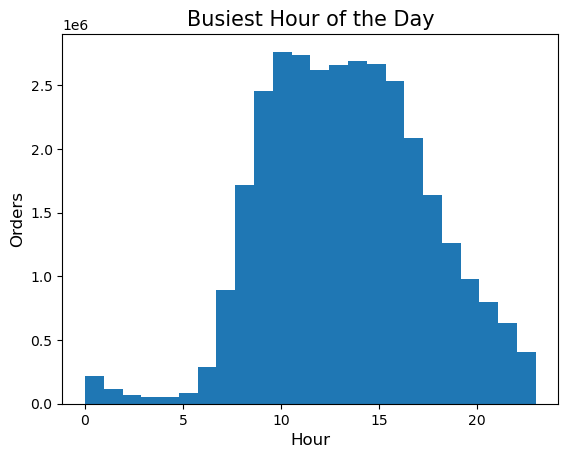

In [7]:
# creating a histogram of the order_hour_of_day column
chist = customer['order_hour_of_day'].plot.hist(bins = 24)

#Adding title and labels
plt.title('Busiest Hour of the Day', fontsize=15)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Orders', fontsize=12)


This histogram above demonstrates that most of the orders are in the middle of the day.

In [9]:
#exporting histogram outside of jupyter in the form of an image file
chist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_ohd.png'))

# 4.) Bar Chart

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

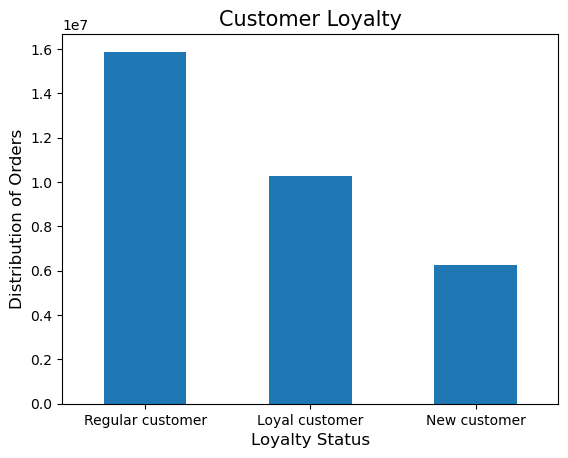

In [9]:
#creating a bar chart for the order_hour_of_day column
customer['loyalty_flag'].value_counts().plot.bar()

#Adding title and labels
plt.title('Customer Loyalty', fontsize=15)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Distribution of Orders', fontsize=12)
plt.xticks(rotation=0)


Text(0, 0.5, 'Distribution of Orders')

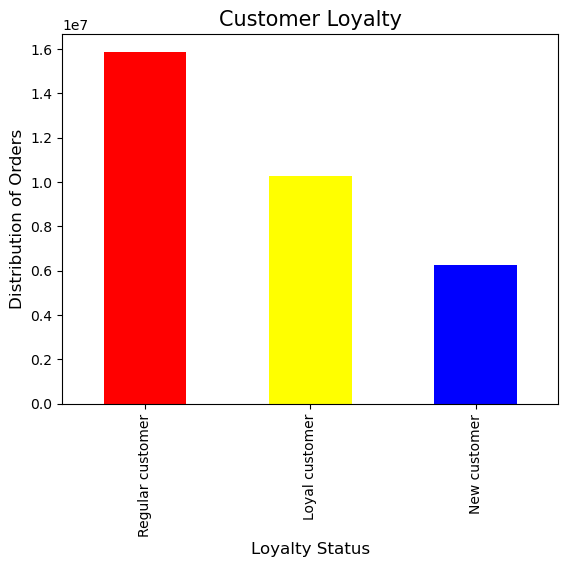

In [14]:
#adding colors to the bar chart
cbar = customer['loyalty_flag'].value_counts().plot.bar(color =['red', 'yellow', 'blue'])

#Adding title and labels
plt.title('Customer Loyalty', fontsize=15)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Distribution of Orders', fontsize=12)


There are more the distribution of orders among regular customers than loyal customers and distribution of orders among loyal customers than new customers.

In [16]:
#exporting bar chart outside of jupyter in the form of an image file
cbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# 5.)

In [18]:
#creating a random but reproducible pattern with the seed command and creating the 70 in the 70/30 split. The dev command stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7.
np.random.seed(8)
dev = np.random.rand(len(customer)) <= 0.7

In [19]:
dev

array([False, False, False, ..., False,  True,  True])

In [20]:
#stores 70% of sample in the dataframe big
big = customer[dev]

In [21]:
#stores 30% of sample in the dataframe small
small = customer[~dev]

In [22]:
#checking the length of the entire customer dataframe
len(customer)

32405122

In [23]:
#checking length of big and small which should equal to the main dataframe
len(big) + len(small)

32405122

In [24]:
#creating a dataframe the contains onlys prices and order_hour_of_day columns from our small subset
customer_2 = small[['order_hour_of_day','prices']]

In [25]:
customer_2

,order_hour_of_day,prices
0,9,9.0
1,15,9.0
2,15,9.0
12,11,12.6
13,17,12.6
...,...,...
32405096,19,3.0
32405098,19,7.2
32405099,18,7.2
32405100,19,13.3


This shows 9 million rows which is 30% of the main dataframe.

# Line Chart

Text(0, 0.5, 'Price')

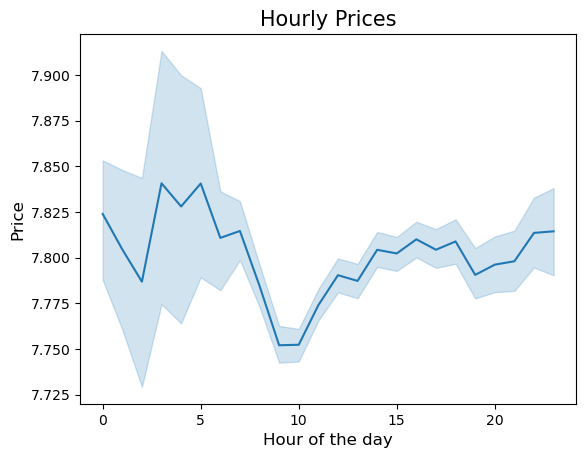

In [43]:
#creating a line chart with the customer_2 dataframe that contains the prices and order_hour_of_day columns
prices_line_chart = sns.lineplot(data = customer_2, x = 'order_hour_of_day',y = 'prices')

#Adding title and labels
plt.title('Hourly Prices', fontsize=15)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Price', fontsize=12)

The line chart shows different peaks (around 0, 5, 7, 15, 22) which mean that most money is spent on those hours. The dip at hour 10 is the lowest point which means the least money is spent at that hour. There is a difference in expenditure based off these peaks and dips.

In [46]:
#exporting line chart outside of jupyter in the form of an image file
prices_line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_prices.png'))

# 6.)

In [56]:
#creating a dataframe the contains onlys age and number_of_dependants columns from our small subset
customer_3 = small[['age','number_of_dependents']]

Text(0, 0.5, 'Number of Dependents')

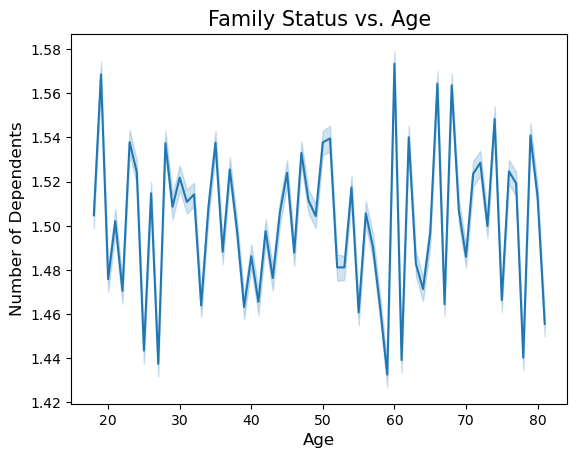

In [58]:
#creating a line chart with the customer_3 dataframe that contains the ages and number_of_dependents columns
age_line_chart = sns.lineplot(data = customer_3, x = 'age',y = 'number_of_dependents')

#Adding title and labels
plt.title('Family Status vs. Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Dependents', fontsize=12)

This line chart describes sporadic values and inconsistent intervals between age and the number of dependants. There is no correlation between age and the number of dependents.

In [33]:
#exporting line chart outside of jupyter in the form of an image file
age_line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age.png'))

# 7.) Scatterplot

Text(0, 0.5, 'Income')

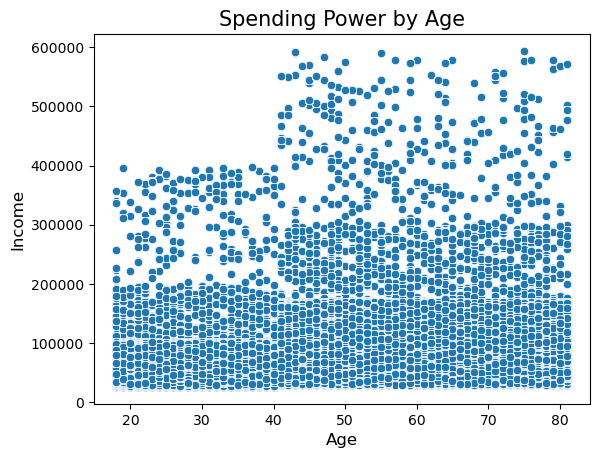

In [49]:
# Creating a scatterplot of prices
age_sp = sns.scatterplot(x = 'age', y = 'income',data = customer)

#Adding title and labels
plt.title('Spending Power by Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)

This scatterplot shows a majority of the data points under 200,000 in the income y-axis. It seems that only people that are 40 and above in the age category are making more than 400,000. This values are extremely spread out.

In [52]:
#exporting scatterplot chart outside of jupyter in the form of an image file
age_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age.png'))